# Plotting invasion threshold for various b/c ratio

The threshold value for social invasion is given by solving the following equation (eq. 1) for $z$:

\begin{equation}
  0= b z h(z) + b\sum_{n \geq 2}{\frac{1}{n}g(n,z,z)} - c
\end{equation}

For differential attachment $h(z) = 0.5$ (eq. 6).

\begin{equation}
  \frac{c}{b} = \frac{1}{2} z + \sum_{n \geq 2}{\frac{1}{n}g(n,z,z)} 
\end{equation}

Moreover the second term is given by (eq. 20): 

\begin{equation}
  \sum_{n=2}^T{\frac{1}{n} g(n,z,z)} = \frac{Tz-1+(1-z)^T}{z (T-1)T}
\end{equation}

which tends to $0$ when $T\longrightarrow +\infty$.

Hence:

\begin{equation}
  \frac{b}{c} =  z + 2 \frac{Tz-1+(1-z)^T}{z (T-1)T}
\end{equation}

Populating the interactive namespace from numpy and matplotlib


(0, 50)

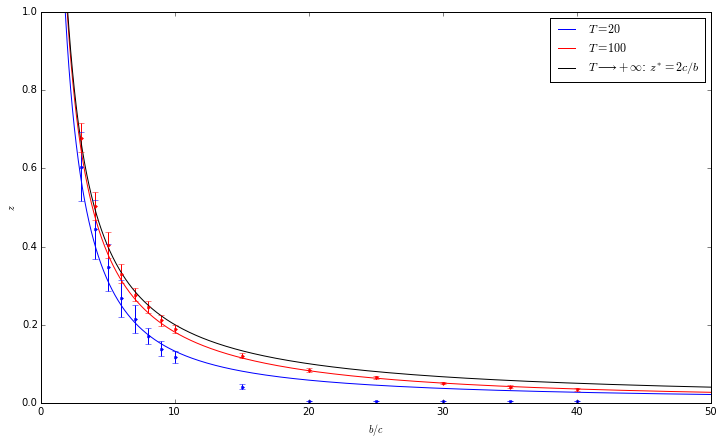

In [38]:
%pylab inline
import pickle
import codecs
plt.figure(figsize=(12,7))

def bc(Z,T):
    """ Return the benefit-to-cost ratio threshold for an invasion by more social mutants
    in an infinite population periodically segemented in T-sized patches
        
    Arguments:
        Z (float in [0,1] or infinite): Resident social trait value. 
        T (integer): Patch size.
    """
    if T == np.inf:
        return 2.0/Z
    else:
        return 2.0/( 2*((T*Z - 1 + (1-Z)**T) / (Z*(T-1)*T) ) + Z)
    
# Loading simulations results (produced with make threshold)
with codecs.open('threshold_kmax10_2T_14b_50times_g100_50repl.pkle','rb') as f:
    data,parameters = pickle.Unpickler(f,fix_imports=True,encoding='bytes').load()

z = np.arange(0.001,1.001,0.001)
theo = 2.0/z

colorcode = {20:'b',100:'r'}


plt.plot(bc(z,20),z, color=colorcode[20],label="$T = 20$")
plt.plot(bc(z,100),z, color=colorcode[100],label="$T = 100$")
plt.plot(bc(z,np.inf),z, color="k",label="$T \longrightarrow + \infty $: $z^* = 2c/b$")

for T,values in data.items():
    values = np.array(values)
    for i in range(int(len(values)/50)):
        y = np.mean(values[i*50:(i+1)*50,0])
        yerr =  np.std(values[i*50:(i+1)*50,0])
        x = values[i*50,1]
        assert np.all(values[i*50:(i+1)*50,1]==x)
        plt.errorbar(x,y,yerr,color=colorcode[T],fmt='.')


plt.legend()
plt.ylabel("$z$")
plt.xlabel("$b/c$")
plt.ylim((0,1))
plt.xlim((0,50))

In [39]:
parameters

{b'T_range': [20, 100],
 b'alpha': 0.75,
 b'b_range': [3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40],
 b'c': 1,
 b'chi': 4,
 b'dz': 0.01,
 b'g': 100,
 b'host': b'Linux|apis|3.2.0-79-generic|#115-Ubuntu SMP Thu Mar 12 14:18:19 UTC 2015|x86_64|x86_64',
 b'invfitness_g': 10,
 b'ip': 0.01,
 b'k': 0.3,
 b'kmax': 10,
 b'lk_R': 1000,
 b'mu': 0,
 b'n': 5000,
 b'precision': 0.01,
 b'range_g': [10, 50, 100, 200],
 b'range_ip': [0.001, 0.005, 0.01, 0.05, 0.1],
 b'replica': 50,
 b's': 0.1,
 b'thres_r': 50,
 b'time': b'Thu Sep 17 23:10:49 2015'}